#Importing our libraries
import os
import requests
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import panel as pn
pn.extension('plotly')
import plotly.express as px
from MCForecastTools import MCSimulation

%matplotlib inline

In [63]:
import os
import panel as pn
pn.extension('plotly')
import plotly.express as px
import requests
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas_datareader import data as wb
import seaborn as sns
import datetime as dt
import numpy as np
from matplotlib import style
from scipy.stats import norm
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

%matplotlib inline

In [216]:
sp500_csv = Path("S&P500.csv")
sp500_df = pd.read_csv(sp500_csv)
sp500_df = sp500_df.rename(columns={"Close":"S&P500"})
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.set_index(["Date"], inplace=True)
sp500_df

,S&P500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03
...,...
2022-01-18,4577.11
2022-01-19,4532.76
2022-01-20,4482.73


## TICKERS BY PRICE

In [218]:
tickers = ["BTC-USD", "ETH-USD", "SOL-USD", "LTC-USD", "ATOM-USD"]
coins_data = pd.DataFrame()
coins_data[tickers] = web.DataReader(tickers, data_source='yahoo', start='2018-1-1')['Adj Close'].pct_change().dropna()
coins_data

,BTC-USD,ETH-USD,SOL-USD,LTC-USD,ATOM-USD
Date,,,,,
2020-04-11,-0.000934,-0.001240,-0.183202,0.001166,-0.001487
2020-04-12,0.016330,0.018496,0.136052,0.003100,0.012017
2020-04-13,-0.018082,-0.030177,-0.118611,-0.029351,-0.030470
2020-04-14,-0.000381,0.008426,-0.149013,-0.003653,0.037750
2020-04-15,-0.029276,-0.027345,-0.023075,-0.035679,-0.030297
...,...,...,...,...,...
2022-01-24,0.010407,-0.037351,-0.079616,-0.022285,0.043895
2022-01-25,0.008176,0.006385,0.033499,-0.013917,-0.002964
2022-01-26,-0.002757,0.004925,-0.026207,-0.007257,-0.096513


## TICKERS BY VOLUME

In [219]:
tickers = ["BTC-USD", "ETH-USD", "SOL-USD", "LTC-USD", "ATOM-USD"]
coins_data_volume = pd.DataFrame()
coins_data_volume[tickers] = wb.DataReader(tickers, data_source='yahoo', start='2018-1-1')['Volume'].pct_change().dropna()
coins_data_volume

,BTC-USD,ETH-USD,SOL-USD,LTC-USD,ATOM-USD
Date,,,,,
2020-04-11,-0.284272,-0.246141,-0.497936,-0.158160,-0.332518
2020-04-12,0.145329,0.115723,-0.116855,0.078441,-0.034145
2020-04-13,0.079971,0.088706,-0.529872,0.098540,0.026039
2020-04-14,-0.116752,-0.105806,-0.080372,-0.071267,0.028916
2020-04-15,-0.053418,-0.037451,-0.219275,-0.004413,0.038594
...,...,...,...,...,...
2022-01-24,0.608759,0.712273,0.830529,0.449385,0.829037
2022-01-25,-0.368603,-0.426672,-0.390582,-0.447670,-0.358718
2022-01-26,0.185272,0.312126,0.117684,0.170497,-0.044868


## Showing RAW Data - Bitcoin, Ethereum, Solana, Litecoin, Cosmos

In [220]:
start = dt.datetime(2018,1,1)
end =dt.datetime.now()

In [221]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Bitcoin
# I only selected the closing price straigth from the source

bitcoin = web.DataReader('BTC-USD', 'yahoo', start, end)

bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195
2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,23840899072,17429.500000
...,...,...,...,...,...,...
2022-01-24,37247.519531,33184.058594,36275.734375,36654.328125,41856658597,36654.328125
2022-01-25,37444.570312,35779.429688,36654.804688,36954.003906,26428189594,36954.003906
2022-01-26,38825.410156,36374.906250,36950.515625,36852.121094,31324598034,36852.121094


In [222]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Ethereum
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,782.530029,742.004028,755.757019,772.640991,2595760128,772.640991
2018-01-02,914.830017,772.346008,772.346008,884.443970,5783349760,884.443970
2018-01-03,974.471008,868.450989,886.000000,962.719971,5093159936,962.719971
2018-01-04,1045.079956,946.085999,961.713013,980.921997,6502859776,980.921997
2018-01-05,1075.390015,956.325012,975.750000,997.719971,6683149824,997.719971
...,...,...,...,...,...,...
2022-01-24,2537.208496,2172.301270,2535.891113,2440.352295,28220804648,2440.352295
2022-01-25,2498.507080,2359.384766,2440.393555,2455.935059,16179776932,2455.935059
2022-01-26,2705.784180,2417.683105,2455.579102,2468.030273,21229909340,2468.030273


In [223]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Solana
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-10,1.313487,0.694187,0.832005,0.951054,87364276,0.951054
2020-04-11,1.049073,0.765020,0.951054,0.776819,43862444,0.776819
2020-04-12,0.956670,0.762426,0.785448,0.882507,38736897,0.882507
2020-04-13,0.891603,0.773976,0.890760,0.777832,18211285,0.777832
2020-04-14,0.796472,0.628169,0.777832,0.661925,16747614,0.661925
...,...,...,...,...,...,...
2022-01-24,99.770515,81.226051,99.617516,91.650162,4664539688,91.650162
2022-01-25,99.701233,87.757126,91.660156,94.720352,2842652332,94.720352
2022-01-26,103.721558,89.807556,94.718834,92.238045,3177186515,92.238045


In [224]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Polygon
litecoin = web.DataReader('LTC-USD', 'yahoo', start, end)
litecoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,236.634003,222.203003,231.666000,229.033005,633142016,229.033005
2018-01-02,263.625000,228.990005,228.990005,255.684006,1237949952,255.684006
2018-01-03,260.742004,243.134995,255.695007,245.367996,3215280128,245.367996
2018-01-04,245.475006,227.013000,245.475006,241.369995,3481550080,241.369995
2018-01-05,256.148010,237.880005,241.033997,249.270996,1710599936,249.270996
...,...,...,...,...,...,...
2022-01-24,112.194672,98.665222,112.100815,109.591599,1645918728,109.591599
2022-01-25,109.682343,106.339424,109.592476,108.066376,909091096,108.066376
2022-01-26,115.783005,105.849983,108.062302,107.282181,1064088735,107.282181


In [225]:
#Using our data source, DataReader, to obtain historical daily output for Cosmos
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-14,6.639943,6.353963,6.439715,6.526642,7318172,6.526642
2019-03-15,7.715249,6.432468,6.633174,7.504351,6057301,7.504351
2019-03-16,8.305615,6.694531,7.507990,7.383882,3477393,7.383882
2019-03-17,7.357443,4.727895,7.357443,4.776164,2653565,4.776164
2019-03-18,5.229982,4.828242,4.828242,5.110341,2567201,5.110341
...,...,...,...,...,...,...
2022-01-24,36.916538,30.106127,34.417797,35.906700,3921084163,35.906700
2022-01-25,37.085804,35.057510,35.895691,35.800282,2514518995,35.800282
2022-01-26,35.863892,31.507872,35.791805,32.345074,2401696392,32.345074


### Data Cleanup - Obtaining what we need, deleting what we do not. Volume and Closing Price are needed.

In [226]:
#Drop unnecessary columns
bitcoin.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
#Rename columns 
bitcoin = bitcoin.rename(columns={"Adj Close":"Bitcoin"})
bitcoin

,Bitcoin
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000
...,...
2022-01-24,36654.328125
2022-01-25,36954.003906
2022-01-26,36852.121094


In [227]:
bitcoin1 = web.DataReader('BTC-USD', 'yahoo', start, end)
bitcoin1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
bitcoin1 = bitcoin1.rename(columns={"Volume":" BTC Volume"})
bitcoin1

,BTC Volume
Date,
2018-01-01,10291200000
2018-01-02,16846600192
2018-01-03,16871900160
2018-01-04,21783199744
2018-01-05,23840899072
...,...
2022-01-24,41856658597
2022-01-25,26428189594
2022-01-26,31324598034


In [228]:
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
ethereum = ethereum.rename(columns={"Adj Close":"Ethereum"})
ethereum

,Ethereum
Date,
2018-01-01,772.640991
2018-01-02,884.443970
2018-01-03,962.719971
2018-01-04,980.921997
2018-01-05,997.719971
...,...
2022-01-24,2440.352295
2022-01-25,2455.935059
2022-01-26,2468.030273


In [229]:
ethereum1 = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
ethereum1 = ethereum1.rename(columns={"Volume":"ETH Volume"})
ethereum1

,ETH Volume
Date,
2018-01-01,2595760128
2018-01-02,5783349760
2018-01-03,5093159936
2018-01-04,6502859776
2018-01-05,6683149824
...,...
2022-01-24,28220804648
2022-01-25,16179776932
2022-01-26,21229909340


In [230]:
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
solana = solana.rename(columns={"Adj Close":"Solana"})
solana

,Solana
Date,
2020-04-10,0.951054
2020-04-11,0.776819
2020-04-12,0.882507
2020-04-13,0.777832
2020-04-14,0.661925
...,...
2022-01-24,91.650162
2022-01-25,94.720352
2022-01-26,92.238045


In [231]:
solana1 = web.DataReader('SOL-USD', 'yahoo', start, end)
solana1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
solana1 = solana1.rename(columns={"Volume":"SOL Volume"})
solana1

,SOL Volume
Date,
2020-04-10,87364276
2020-04-11,43862444
2020-04-12,38736897
2020-04-13,18211285
2020-04-14,16747614
...,...
2022-01-24,4664539688
2022-01-25,2842652332
2022-01-26,3177186515


In [232]:
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
cosmos = cosmos.rename(columns={"Adj Close":"Cosmos"})
cosmos

,Cosmos
Date,
2019-03-14,6.526642
2019-03-15,7.504351
2019-03-16,7.383882
2019-03-17,4.776164
2019-03-18,5.110341
...,...
2022-01-24,35.906700
2022-01-25,35.800282
2022-01-26,32.345074


In [233]:
cosmos1 = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
cosmos1 = cosmos1.rename(columns={"Volume":"ATOM Volume"})
cosmos1

,ATOM Volume
Date,
2019-03-14,7318172
2019-03-15,6057301
2019-03-16,3477393
2019-03-17,2653565
2019-03-18,2567201
...,...
2022-01-24,3921084163
2022-01-25,2514518995
2022-01-26,2401696392


In [234]:
litecoin = web.DataReader('LTC-USD', 'yahoo', start, end)
litecoin.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
litecoin = litecoin.rename(columns={"Adj Close":"Litecoin"})
litecoin

,Litecoin
Date,
2018-01-01,229.033005
2018-01-02,255.684006
2018-01-03,245.367996
2018-01-04,241.369995
2018-01-05,249.270996
...,...
2022-01-24,109.591599
2022-01-25,108.066376
2022-01-26,107.282181


In [235]:
litecoin1 = web.DataReader('LTC-USD', 'yahoo', start, end)
litecoin1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
litecoin1 = litecoin1.rename(columns={"Volume":"Litecoin Volume"})
litecoin1

,Litecoin Volume
Date,
2018-01-01,633142016
2018-01-02,1237949952
2018-01-03,3215280128
2018-01-04,3481550080
2018-01-05,1710599936
...,...
2022-01-24,1645918728
2022-01-25,909091096
2022-01-26,1064088735


In [236]:
# combined close data frame all selected coins
combined_close_df_all = pd.concat([bitcoin, ethereum, solana, cosmos, litecoin], axis='columns', join='inner').dropna()
combined_close_df_all

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Date,,,,,
2020-04-10,6865.493164,158.412445,0.951054,2.307957,42.269814
2020-04-11,6859.083008,158.216019,0.776819,2.304524,42.319099
2020-04-12,6971.091797,161.142426,0.882507,2.332218,42.450287
2020-04-13,6845.037598,156.279556,0.777832,2.261155,41.204342
2020-04-14,6842.427734,157.596390,0.661925,2.346514,41.053841
...,...,...,...,...,...
2022-01-24,36654.328125,2440.352295,91.650162,35.906700,109.591599
2022-01-25,36954.003906,2455.935059,94.720352,35.800282,108.066376
2022-01-26,36852.121094,2468.030273,92.238045,32.345074,107.282181


In [237]:
#Combining Price data and converting to percent change. Dropping nulls.

combined_close_df = pd.concat([bitcoin, ethereum, solana, cosmos, litecoin], axis='columns', join='inner').pct_change().dropna()
combined_close_df

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Date,,,,,
2020-04-11,-0.000934,-0.001240,-0.183202,-0.001487,0.001166
2020-04-12,0.016330,0.018496,0.136052,0.012017,0.003100
2020-04-13,-0.018082,-0.030177,-0.118611,-0.030470,-0.029351
2020-04-14,-0.000381,0.008426,-0.149013,0.037750,-0.003653
2020-04-15,-0.029276,-0.027345,-0.023075,-0.030297,-0.035679
...,...,...,...,...,...
2022-01-24,0.010407,-0.037351,-0.079616,0.043895,-0.022285
2022-01-25,0.008176,0.006385,0.033499,-0.002964,-0.013917
2022-01-26,-0.002757,0.004925,-0.026207,-0.096513,-0.007257


In [355]:
#Combining Volume data and converting to percent change. Dropping nulls.
combined_volume_df= pd.concat([bitcoin1, ethereum1, solana1,cosmos1, litecoin1], axis='columns', join='outer').pct_change().dropna()
combined_volume_df

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,Litecoin Volume
Date,,,,,
2020-04-11,-0.284272,-0.246141,-0.497936,-0.332518,-0.158160
2020-04-12,0.145329,0.115723,-0.116855,-0.034145,0.078441
2020-04-13,0.079971,0.088706,-0.529872,0.026039,0.098540
2020-04-14,-0.116752,-0.105806,-0.080372,0.028916,-0.071267
2020-04-15,-0.053418,-0.037451,-0.219275,0.038594,-0.004413
...,...,...,...,...,...
2022-01-24,0.608759,0.712273,0.830529,0.829037,0.449385
2022-01-25,-0.368603,-0.426672,-0.390582,-0.358718,-0.447670
2022-01-26,0.185272,0.312126,0.117684,-0.044868,0.170497


## Plotting concatenated data

<AxesSubplot:xlabel='Date'>

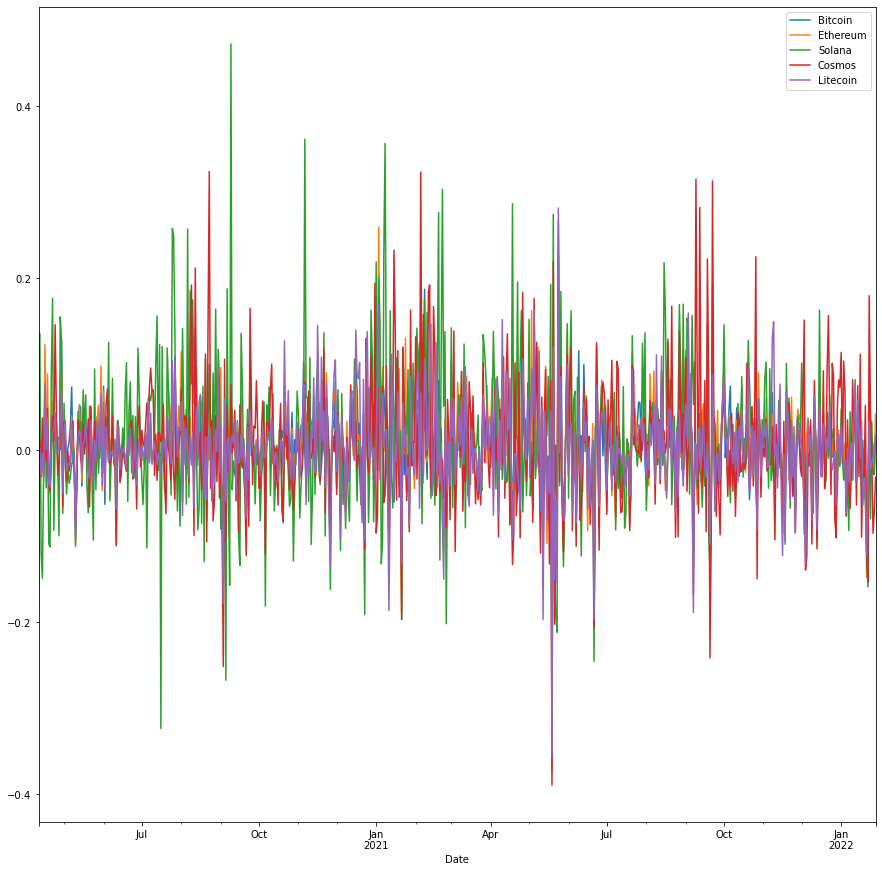

In [356]:
#Plotting percent change to show volatity of price
combined_close_df.plot(figsize=(15,15))

<AxesSubplot:xlabel='Date'>

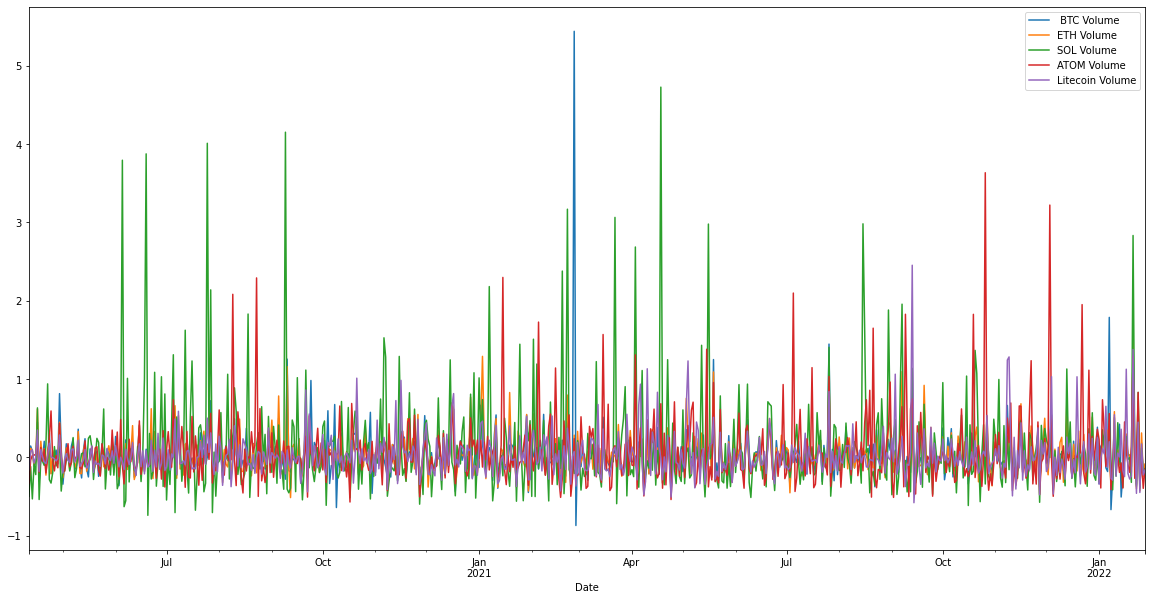

In [240]:
#Plotting percent change to show volatity of volume
combined_volume_df.plot(figsize=(20,10))

## The above are good looking graphs but we can't really decipher much from it other than showing us that the closing price is volatile

## PANDAS Speak!

In [329]:
#HVPlot shows volality of price and volume
combined_close_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [334]:
combined_volume_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Depiction of stock risk using standard deviation

<AxesSubplot:>

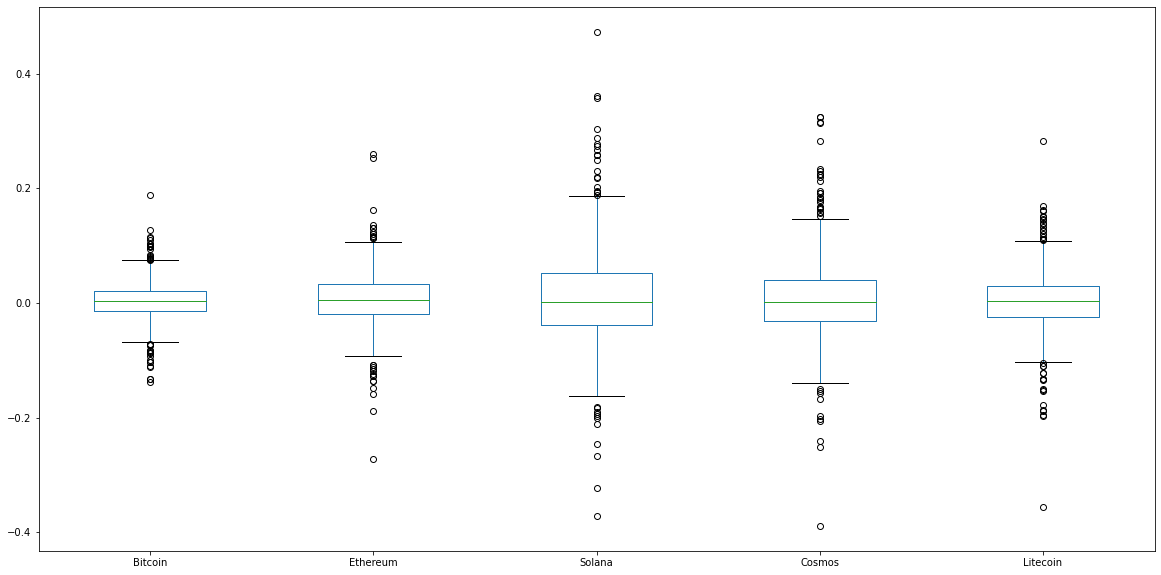

In [333]:
combined_close_df.plot.box(figsize=(20,10))

In [332]:
close_std = combined_close_df.std().sort_values(ascending = False)
close_std

Solana      0.086518
Cosmos      0.074291
Litecoin    0.054069
Ethereum    0.049520
Bitcoin     0.036909
dtype: float64

In [337]:
combined_close_df.describe()

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
count,658.000000,658.000000,658.000000,658.000000,658.000000
mean,0.003271,0.005445,0.010606,0.006591,0.002932
std,0.036909,0.049520,0.086518,0.074291,0.054069
min,-0.137661,-0.272003,-0.372088,-0.389349,-0.356729
25%,-0.014642,-0.020076,-0.038594,-0.031776,-0.024357
50%,0.002668,0.005597,0.002107,0.001751,0.002556
75%,0.021117,0.032696,0.051993,0.040194,0.028898
max,0.187465,0.259475,0.472828,0.324360,0.282016


## CALCULATING THE CORRELATIONS BETWEEN DAILY RETURNS BY PRICE

In [339]:
combined_close_df.corr()

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin
Bitcoin,1.000000,0.757229,0.348168,0.484265,0.775428
Ethereum,0.757229,1.000000,0.484778,0.567781,0.790943
Solana,0.348168,0.484778,1.000000,0.382920,0.391199
Cosmos,0.484265,0.567781,0.382920,1.000000,0.534979
Litecoin,0.775428,0.790943,0.391199,0.534979,1.000000


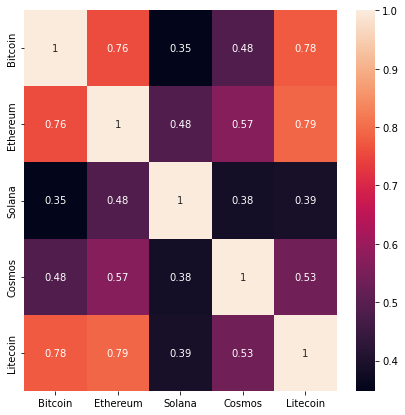

In [340]:
## Daily Return Correlation by Price
plt.figure(figsize=(7, 7))
ax = plt.subplot()
sns.heatmap(combined_close_df.corr(), annot = True, ax = ax);

## CALCULATING THE CORRELATIONS BETWEEN DAILY RETURNS BY VOLUME

In [341]:
combined_volume_df.corr()

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,Litecoin Volume
BTC Volume,1.000000,0.606856,0.215136,0.264282,0.436480
ETH Volume,0.606856,1.000000,0.341524,0.291856,0.597392
SOL Volume,0.215136,0.341524,1.000000,0.130384,0.233667
ATOM Volume,0.264282,0.291856,0.130384,1.000000,0.248638
Litecoin Volume,0.436480,0.597392,0.233667,0.248638,1.000000


,Bitcoin,Ethereum,Solana,Cosmos,Litecoin,S&P500
Date,,,,,,
2020-04-14,-0.000381,0.008426,-0.149013,0.037750,-0.003653,0.030573
2020-04-15,-0.029276,-0.027345,-0.023075,-0.030297,-0.035679,-0.022030
2020-04-16,0.071467,0.123106,0.068298,0.061794,0.078303,0.005817
2020-04-17,-0.002897,-0.003014,-0.043554,-0.012006,0.001312,0.026794
2020-04-20,-0.030189,0.003837,-0.184518,-0.041464,-0.044839,-0.017881
...,...,...,...,...,...,...
2022-01-18,-0.016800,-0.044102,-0.031280,-0.053069,-0.019583,-0.018388
2022-01-19,-0.014898,-0.021555,-0.040927,-0.031293,-0.035056,-0.009690
2022-01-20,-0.025486,-0.030591,-0.063237,0.052348,-0.047852,-0.011037


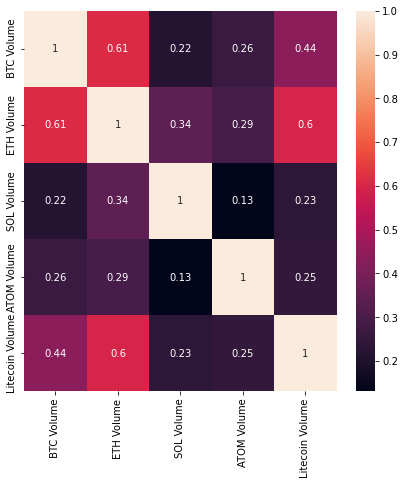

In [343]:
#Daily Return Correlation by volume
plt.figure(figsize=(7, 7))
ax = plt.subplot()
sns.heatmap(combined_volume_df.corr(), annot = True, ax = ax);

## S&P500 correlation against our portfolio

In [350]:
combined_close_sp500_df = pd.concat([bitcoin, ethereum, solana, cosmos, litecoin, sp500_df], axis='columns', join='inner').pct_change().dropna()
combined_close_sp500_df

,Bitcoin,Ethereum,Solana,Cosmos,Litecoin,S&P500
Date,,,,,,
2020-04-14,-0.000381,0.008426,-0.149013,0.037750,-0.003653,0.030573
2020-04-15,-0.029276,-0.027345,-0.023075,-0.030297,-0.035679,-0.022030
2020-04-16,0.071467,0.123106,0.068298,0.061794,0.078303,0.005817
2020-04-17,-0.002897,-0.003014,-0.043554,-0.012006,0.001312,0.026794
2020-04-20,-0.030189,0.003837,-0.184518,-0.041464,-0.044839,-0.017881
...,...,...,...,...,...,...
2022-01-18,-0.016800,-0.044102,-0.031280,-0.053069,-0.019583,-0.018388
2022-01-19,-0.014898,-0.021555,-0.040927,-0.031293,-0.035056,-0.009690
2022-01-20,-0.025486,-0.030591,-0.063237,0.052348,-0.047852,-0.011037


## Stock returns are normally distributed with zero mean 
## Notice how ETHEREUM and COSMOS Standard deviation is higher indicating a more volatile stock
## At 2% S&P displays appears to be a stable stock index


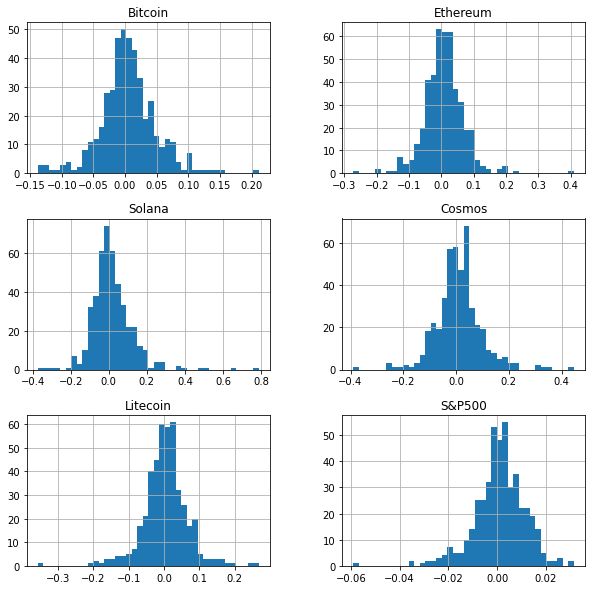

In [345]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Etherium Standard deviation is high indicating a more volatile stock

combined_close_sp500_df.hist(figsize=(10, 10), bins = 40);


<AxesSubplot:xlabel='Date'>

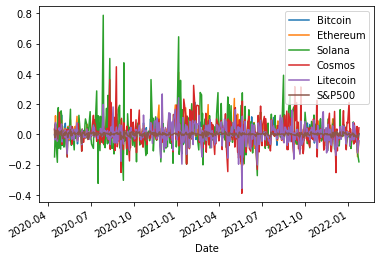

In [349]:
combined_close_sp500_df.plot()

In [351]:
# HVPLOT gives us the ability to dig deeper into the data and even switch on and off our comparisons
# S&P 500 correllation against our portfolio

combined_close_sp500_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [352]:
#Listing Stocks in our portfolio
    
for i in combined_close_sp500_df.columns[1:]:
  print(i)

# Print out the number of stocks
print('\nTotal Number of stocks is: {}'.format(len(combined_close_sp500_df.columns[1:])))

Ethereum
Solana
Cosmos
Litecoin
S&P500

Total Number of stocks is: 5
